# Week 7, HW: Unsupervised Learning (Iris classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# data import
data = pd.read_csv('Iris.csv')
df = data.copy()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# dropping ID and Species columns
df.drop(columns=['Id','Species'], axis=1, inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


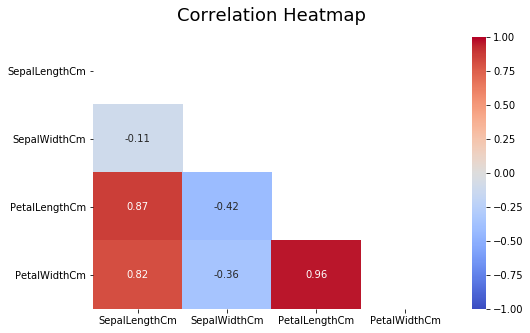

In [5]:
# correlation
plt.figure(figsize=(8,5))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

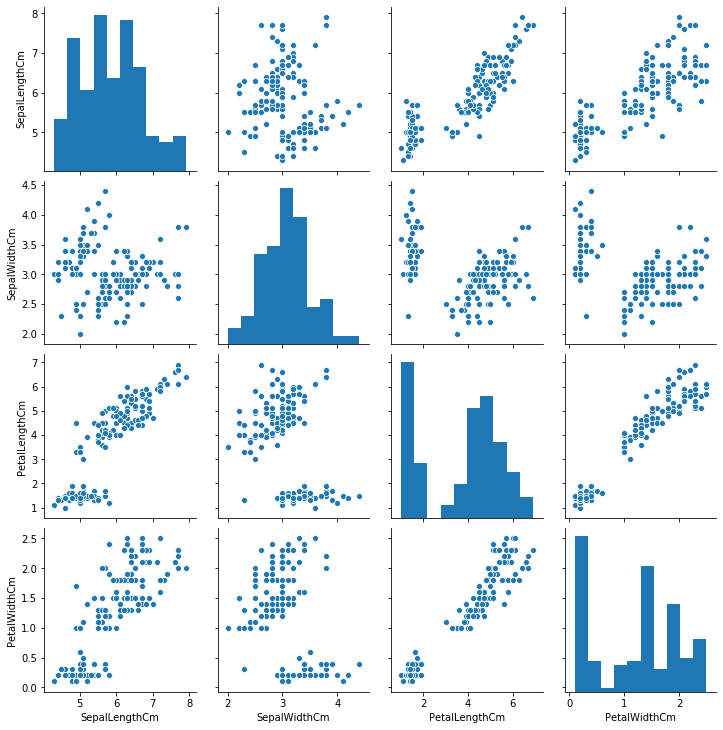

In [6]:
# pairplot
sns.pairplot(df)

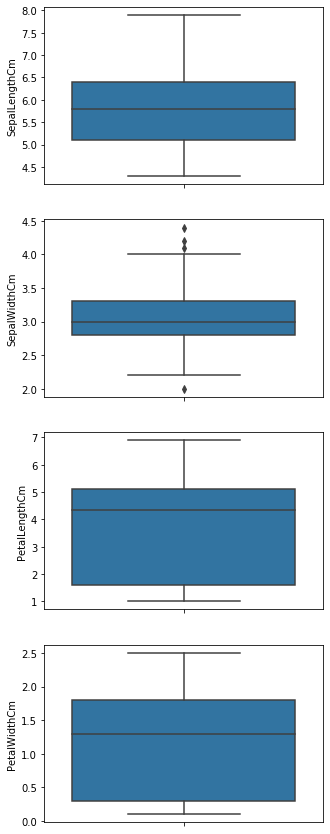

In [7]:
# box plots
column_names = df.columns
fig, axes = plt.subplots(nrows=len(column_names), figsize=(5,15))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i], y=column_names[i], data=df)

We have outliers in the second boxplot. Since the number of data points is low, we will not delete outliers.

In [8]:
# outlier treatment
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1, Q3 = np.percentile(datacolumn, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [9]:
lowerbound, upperbound = outlier_treatment(df['SepalWidthCm'])
df['SepalWidthCm'] = np.clip(df['SepalWidthCm'], a_min=lowerbound, a_max=upperbound)

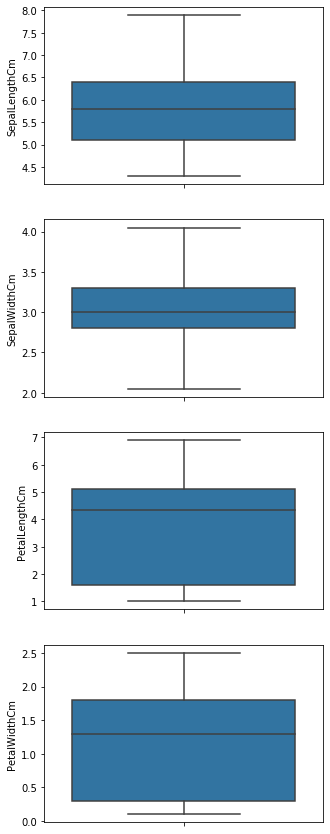

In [10]:
# box plots (treated)
column_names = df.columns
fig, axes = plt.subplots(nrows=len(column_names), figsize=(5,15))
for i in range(len(column_names)):
    sns.boxplot(ax=axes[i], y=column_names[i], data=df)

In [11]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=column_names)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.065722,-1.341272,-1.312977
1,-1.143017,-0.120170,-1.341272,-1.312977
2,-1.385353,0.354187,-1.398138,-1.312977
3,-1.506521,0.117008,-1.284407,-1.312977
4,-1.021849,1.302901,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.120170,0.819624,1.447956
146,0.553333,-1.306063,0.705893,0.922064
147,0.795669,-0.120170,0.819624,1.053537
148,0.432165,0.828544,0.933356,1.447956


## K-Means Clustering 

In [6]:
from sklearn.cluster import KMeans

In [12]:
# fit K-means
k_means = KMeans(n_clusters=3, random_state=42).fit(df)

In [13]:
# predicted labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
# adding a new column (predicted labels)
df_final = data.copy()
df_final['KMeans_clusters'] = k_means.labels_
df_final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [15]:
# rename predicted values in a new column
df_final['KMeans_clusters'].replace({0:'Iris-versicolor', 
                                     1:'Iris-sertosa', 
                                     2:'Iris-virginica'}, inplace=True)

df_final

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-sertosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-sertosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-sertosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-sertosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-sertosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-versicolor
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica


In [17]:
# value count for original data
df_final.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [18]:
# value counts for predicted data
df_final.KMeans_clusters.value_counts()

Iris-versicolor    52
Iris-sertosa       50
Iris-virginica     48
Name: KMeans_clusters, dtype: int64

Acoording to K-Means clustering algorithm results, only 2 values were incorrectly predicted.

## Hierarchical Clustering

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
# fit Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [22]:
# predicted labels
hc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2], dtype=int64)

In [21]:
# adding a new column (predicted labels)
df_final['Hierachical_clusters'] = hc

In [23]:
# rename predicted values in a new column
df_final['Hierachical_clusters'].replace({0:'Iris-versicolor', 
                                     1:'Iris-sertosa', 
                                     2:'Iris-virginica'}, inplace=True)

In [24]:
# data display
df_final.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,KMeans_clusters,Hierachical_clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-sertosa,Iris-sertosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-sertosa,Iris-sertosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-sertosa,Iris-sertosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-sertosa,Iris-sertosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-sertosa,Iris-sertosa


In [26]:
# value count for original data
df_final.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [25]:
# value count for predicted data
df_final.Hierachical_clusters.value_counts()

Iris-versicolor    56
Iris-sertosa       49
Iris-virginica     45
Name: Hierachical_clusters, dtype: int64

Acoording to Hierachical clustering algorithm results, several values were incorrectly predicted.

### Thus, K-Means provided better prediction results